In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv(r"/kaggle/input/wine-quality-dataset/WineQT.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


### Helper Functions

In [6]:
def remove_outliers(df, column): # used 0.1 and 0.9
    Q1 = df[column].quantile(0.1)
    Q3 = df[column].quantile(0.9)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_out

def print_uvariate_statistics(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    print(f"Mean of {column} is {df[column].mean()}")
    print(f"Median of {column} is {df[column].median()}")
    print(f"Skewness of {column} is {df[column].skew()}")
    print(f"Std of {column} is {df[column].std()}")
    print(f"IQR of {column} is {Q3 - Q1}")

def print_null_percent(df):
    null_perc = df.isna().sum() / len(df)
    return null_perc.apply(lambda x: f"{x:.1%}")

def get_one_hot_drop(df, *columns):
    for column in columns:
        one_hot = pd.get_dummies(df[column])
        one_hot = one_hot.drop(columns=one_hot.columns[0]).astype("int")
        

        df = pd.concat([df.drop(columns=[column]),
                            one_hot], axis=1)
        
    return df

# Setting the matplotlib/seaborn theme
sns.set_style("darkgrid")
sns.set_theme(rc={"axes.facecolor":"#c3c4c4", 
                  "figure.facecolor":"lightgray",
                  "axes.grid": True, "grid.color": 
                  "white"})

### Removing Outliers

In [7]:
for column in df.columns:
    df = remove_outliers(df, column)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1082 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1082 non-null   float64
 1   volatile acidity      1082 non-null   float64
 2   citric acid           1082 non-null   float64
 3   residual sugar        1082 non-null   float64
 4   chlorides             1082 non-null   float64
 5   free sulfur dioxide   1082 non-null   float64
 6   total sulfur dioxide  1082 non-null   float64
 7   density               1082 non-null   float64
 8   pH                    1082 non-null   float64
 9   sulphates             1082 non-null   float64
 10  alcohol               1082 non-null   float64
 11  quality               1082 non-null   int64  
 12  Id                    1082 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 118.3 KB


### Describe Data

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1082.0,8.290481,1.753345,4.60000,7.100000,7.9000,9.1000,15.6000
volatile acidity,1082.0,0.531123,0.177559,0.12000,0.390000,0.5200,0.6400,1.3300
citric acid,1082.0,0.260203,0.192449,0.00000,0.080000,0.2400,0.4100,0.7900
residual sugar,1082.0,2.396719,0.875906,0.90000,1.900000,2.2000,2.6000,6.4000
chlorides,1082.0,0.080089,0.018477,0.01200,0.070000,0.0790,0.0880,0.1710
free sulfur dioxide,1082.0,15.277726,9.692582,1.00000,7.000000,13.0000,21.0000,53.0000
total sulfur dioxide,1082.0,44.513401,30.409646,6.00000,21.000000,36.0000,59.0000,165.0000
density,1082.0,0.996661,0.001878,0.99007,0.995513,0.9966,0.9978,1.0032
pH,1082.0,3.318863,0.153019,2.86000,3.212500,3.3200,3.4100,4.0100
sulphates,1082.0,0.643614,0.135270,0.33000,0.550000,0.6200,0.7200,1.2200


There is no string value

In [9]:
for column in df.columns:
    if column!="Id":
        print_uvariate_statistics(df,column)
        print("*"*100)

Mean of fixed acidity is 8.290480591497227
Median of fixed acidity is 7.9
Skewness of fixed acidity is 1.0305402926715175
Std of fixed acidity is 1.7533454081682012
IQR of fixed acidity is 2.0
****************************************************************************************************
Mean of volatile acidity is 0.53112292051756
Median of volatile acidity is 0.52
Skewness of volatile acidity is 0.5358767264458015
Std of volatile acidity is 0.1775586329436372
IQR of volatile acidity is 0.25
****************************************************************************************************
Mean of citric acid is 0.26020332717190386
Median of citric acid is 0.24
Skewness of citric acid is 0.355396257899963
Std of citric acid is 0.19244941252482198
IQR of citric acid is 0.32999999999999996
****************************************************************************************************
Mean of residual sugar is 2.3967190388170057
Median of residual sugar is 2.2
Skewness of resi

In [10]:
print_null_percent(df)

fixed acidity           0.0%
volatile acidity        0.0%
citric acid             0.0%
residual sugar          0.0%
chlorides               0.0%
free sulfur dioxide     0.0%
total sulfur dioxide    0.0%
density                 0.0%
pH                      0.0%
sulphates               0.0%
alcohol                 0.0%
quality                 0.0%
Id                      0.0%
dtype: object

There is no missing value

# Data Visualization

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


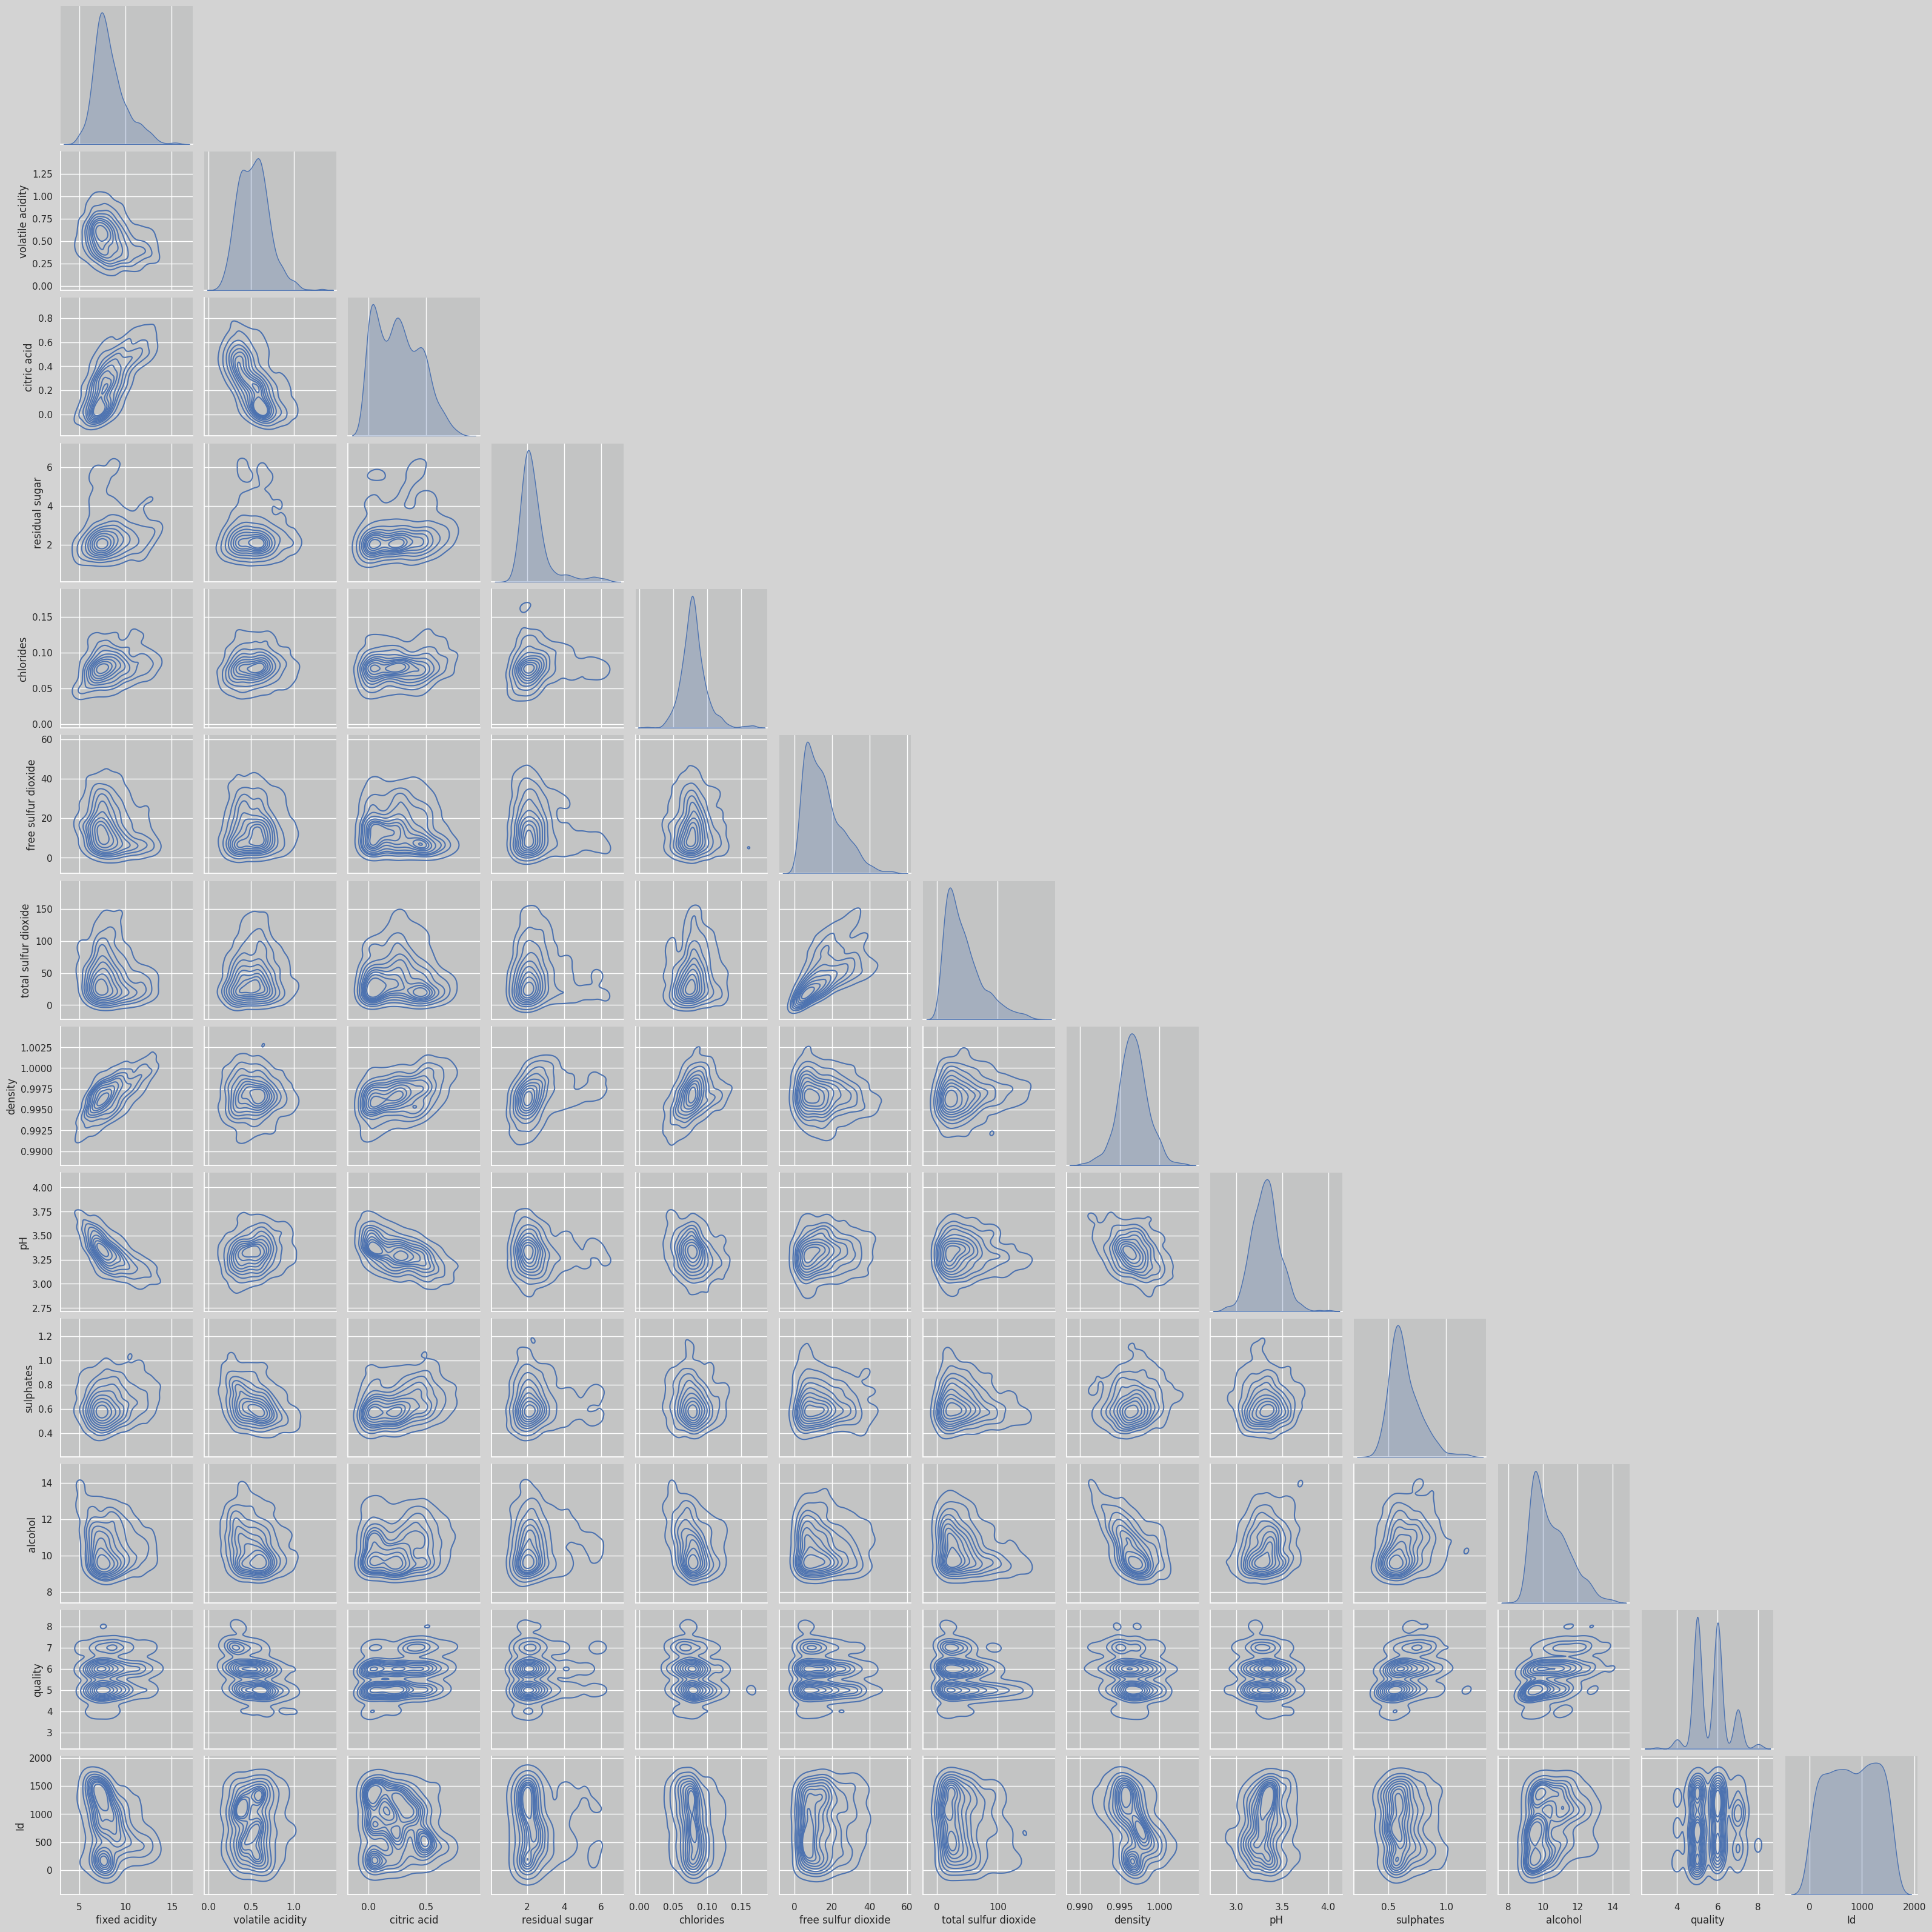

In [11]:
sns.pairplot(df, kind="kde",corner=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
quality,,,,,,,,,,,,
3,8.175000,0.798750,0.195000,2.950000,0.073750,9.750000,30.500000,0.997982,3.377500,0.567500,9.712500,1227.750000
4,7.765625,0.705625,0.139687,2.540625,0.078687,14.312500,39.718750,0.996578,3.411563,0.595313,10.287500,709.781250
5,8.133260,0.584289,0.230678,2.377790,0.083821,16.010941,53.718818,0.996991,3.309781,0.596630,9.924508,757.761488
6,8.311899,0.506762,0.259130,2.331121,0.078817,15.181922,39.283753,0.996551,3.331442,0.663158,10.689626,867.359268
7,8.816176,0.396066,0.372868,2.591912,0.073316,14.007353,33.705882,0.996017,3.294632,0.737868,11.485417,842.235294
8,8.806250,0.410000,0.432500,2.643750,0.070187,11.062500,29.375000,0.995553,3.240625,0.766250,11.937500,797.875000


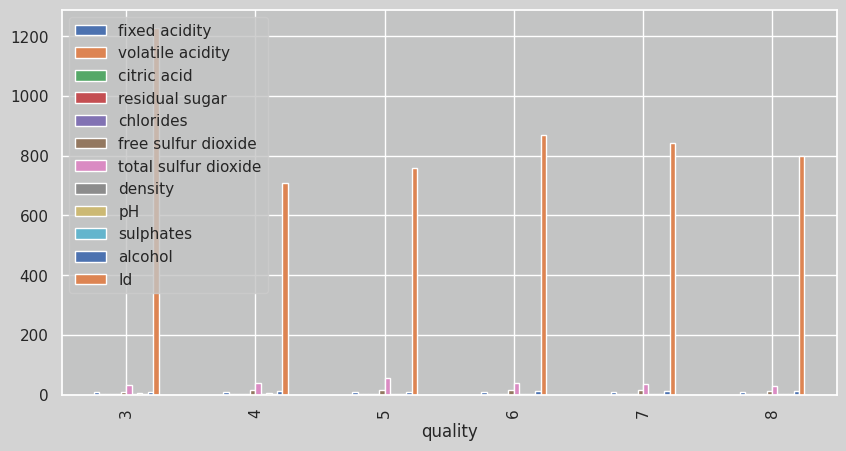

In [12]:
# To see quality stats 

average_quality = df.groupby("quality").mean()

average_quality.plot(kind="bar",figsize=(10,5))
average_quality

<Axes: >

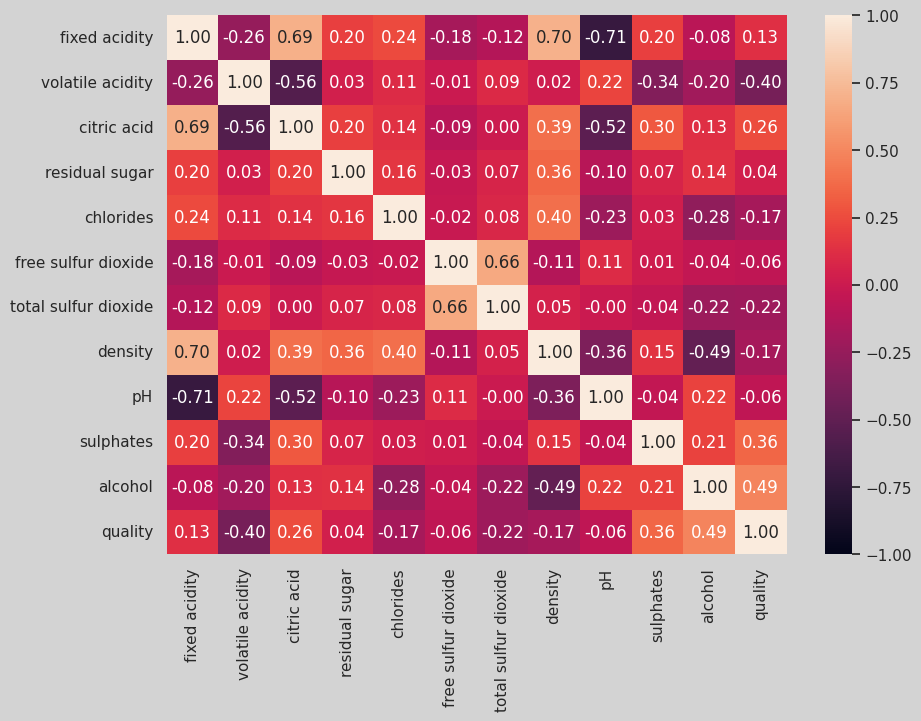

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(df.drop(columns=['Id']).corr(), annot=True,vmin=-1, vmax=1,fmt=".2f")

In [14]:
# Correlation Matrix
corr_matrix = df.drop(columns=['Id']).corr()

# "Sorting correlations from largest to smallest with the "Quality" column
correlation_with_quality = corr_matrix['quality'].sort_values(ascending=False)

print(correlation_with_quality)


quality                 1.000000
alcohol                 0.490107
sulphates               0.359341
citric acid             0.256196
fixed acidity           0.127932
residual sugar          0.035822
free sulfur dioxide    -0.061130
pH                     -0.062337
chlorides              -0.173078
density                -0.174319
total sulfur dioxide   -0.215280
volatile acidity       -0.395019
Name: quality, dtype: float64


In [15]:
# using graph interactive the show the effect density - fixed acidity in the quality

px.scatter(df, x="density", y="fixed acidity",animation_frame="quality")

# Model Building

In [16]:
# Importing the basic librarires for building model

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score

In [17]:
#Defined X value and y value , and split the data train

X = df.drop(columns="quality")           
y = df["quality"]    # y = quality

In [18]:
# split the data train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)


X Train :  (865, 12)
X Test  :  (217, 12)
Y Train :  (865,)
Y Test  :  (217,)


In [19]:
# Using the model LinearRegression

LR_model=LinearRegression()

# Fiting model
LR_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", LR_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", LR_model.score(X_test,y_test))

# Expected value Y using X test
y_pred_LR=LR_model.predict(X_test)

# Model Evaluation
print( " Model Evaluation Linear R : mean absolute error is ", mean_absolute_error(y_test,y_pred_LR))
print(" Model Evaluation Linear R : mean squared  error is " , mean_squared_error(y_test,y_pred_LR))
print(" Model Evaluation Linear R : median absolute error is " ,median_absolute_error(y_test,y_pred_LR)) 

Score the X-train with Y-train is :  0.3883537106320164
Score the X-test  with Y-test  is :  0.372185129985399
 Model Evaluation Linear R : mean absolute error is  0.4745407753117563
 Model Evaluation Linear R : mean squared  error is  0.37101726948472713
 Model Evaluation Linear R : median absolute error is  0.3918844487255839
